In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import datetime as dt

In [2]:
housing_raw = pd.read_csv(
    'Data Viz with Matplotlib & Seaborn/Data/housing_data.csv',
    parse_dates=['period_begin','period_end'],
    dtype={
        'total_homes_sold':'Int32',
        'region_name':'category'
    })
housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [3]:
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622339 entries, 0 to 622338
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   region_name               622339 non-null  category      
 1   period_begin              622339 non-null  datetime64[ns]
 2   period_end                622339 non-null  datetime64[ns]
 3   total_homes_sold          567839 non-null  Int32         
 4   inventory                 616247 non-null  float64       
 5   active_listings           616905 non-null  float64       
 6   age_of_inventory          616247 non-null  float64       
 7   median_active_list_price  616513 non-null  float64       
 8   months_of_supply          561319 non-null  float64       
dtypes: Int32(1), category(1), datetime64[ns](2), float64(5)
memory usage: 37.5 MB


In [4]:
# loc: seleciona só o que contem CA
# assign: remove o estado + 'county' da str
ca_housing = housing_raw.loc[
    (housing_raw['region_name'].str.contains('CA'))
].assign(region_name = housing_raw['region_name'].str[0:-11])

In [5]:
ca_housing.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 15228 entries, 6 to 622302
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   region_name               15228 non-null  object        
 1   period_begin              15228 non-null  datetime64[ns]
 2   period_end                15228 non-null  datetime64[ns]
 3   total_homes_sold          14841 non-null  Int32         
 4   inventory                 15217 non-null  float64       
 5   active_listings           15218 non-null  float64       
 6   age_of_inventory          15217 non-null  float64       
 7   median_active_list_price  15208 non-null  float64       
 8   months_of_supply          14829 non-null  float64       
dtypes: Int32(1), datetime64[ns](2), float64(5), object(1)
memory usage: 1.8 MB


In [6]:
ca_housing_pivot = ca_housing.pivot_table(
    index='period_begin',
    columns='region_name',
    values='median_active_list_price'
).assign(
    CA_average = lambda x: x.mean(axis=1)
)

In [7]:
ca_housing_pivot

region_name,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,El Dorado,Fresno,Glenn,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba,CA_average
period_begin,,,,,,,,,,,,,,,,,,,,,
2017-01-02,730602.5,317541.6,408570.6,291315.3,503458.3,339075.0,603901.2,557404.1,251850.0,237145.8,...,300302.0,257172.9,241695.8,374187.5,225395.8,493908.3,661054.7,447859.2,326833.3,492258.437736
2017-01-09,736230.0,324125.0,408566.4,292348.2,517645.8,340291.6,610701.2,563658.3,253016.6,237145.8,...,301900.0,264609.3,243979.1,368312.5,227729.1,449816.6,662463.1,449942.5,336129.1,493710.639623
2017-01-16,742021.6,330708.3,408483.2,293514.9,524108.3,340291.6,616534.5,565908.3,254187.5,237841.6,...,303858.3,270795.8,246266.6,363729.1,229060.4,412975.0,664828.6,453525.8,345425.0,495369.416981
2017-01-23,748271.7,341458.3,408404.0,294619.1,536408.3,341958.3,621617.8,567158.3,255854.1,238041.6,...,306350.0,274861.4,248141.6,360437.5,229806.2,373483.3,666362.5,456875.8,354720.8,497191.662264
2017-01-30,753938.4,355541.6,407079.0,295527.4,543704.1,344041.6,625516.2,567533.3,258000.0,238125.0,...,308191.6,279764.5,249762.5,360250.0,230139.5,333991.6,668787.5,458300.8,364016.6,499286.207547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-28,993370.2,493750.0,490808.3,462903.3,536384.6,388843.1,828948.5,699814.4,423755.8,383095.8,...,490624.0,461765.4,413387.3,464625.0,387928.9,479870.2,863099.5,655881.0,463954.5,686582.361818
2022-04-04,997424.5,478666.6,490808.3,462153.3,535051.2,388183.3,829281.8,699752.0,425564.1,383720.8,...,489378.1,462190.4,416804.0,468041.6,388951.8,478203.5,865182.9,654630.9,462704.5,687180.140000
2022-04-11,997720.8,469981.6,490808.3,461320.0,534126.2,392475.0,829281.8,699760.3,426772.5,385720.8,...,488128.1,462948.7,420220.6,476333.3,389863.7,469599.3,867682.8,654805.0,462830.0,687730.720000


In [8]:
ca_housing_markets = ca_housing_pivot.loc[:,[
    'San Francisco',
    'Los Angeles',
    'San Diego',
    'CA_average'
]]
ca_housing_markets

region_name,San Francisco,Los Angeles,San Diego,CA_average
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,492258.437736
2017-01-09,1233393.7,614061.0,621737.5,493710.639623
2017-01-16,1239977.0,617311.0,625820.8,495369.416981
2017-01-23,1247977.0,620644.3,629491.6,497191.662264
2017-01-30,1253310.4,624541.6,632824.0,499286.207547
...,...,...,...,...
2022-03-28,1289875.0,906783.0,901649.6,686582.361818
2022-04-04,1289916.6,906783.1,902899.8,687180.140000
2022-04-11,1290250.0,906782.4,902899.8,687730.720000


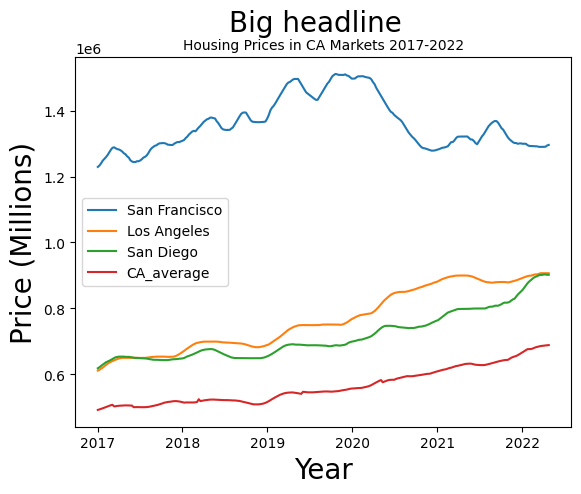

In [9]:
fig, ax = plt.subplots()

ax.plot(ca_housing_markets)

fig.suptitle('Big headline', fontsize=20)
ax.set_title('Housing Prices in CA Markets 2017-2022', fontsize=10)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Price (Millions)', fontsize=20)

ax.legend(ca_housing_markets.columns)

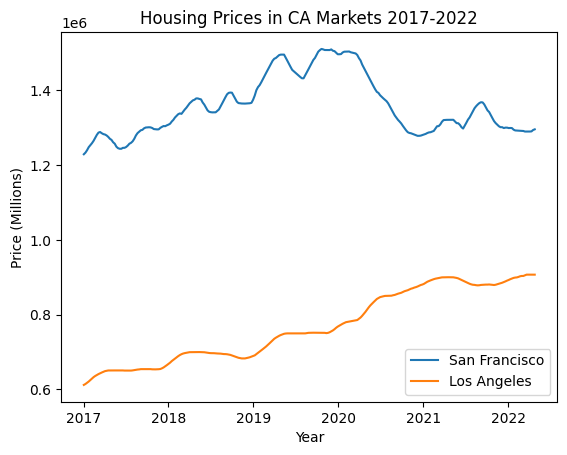

In [10]:
fig, ax = plt.subplots()

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['San Francisco'],
    label='San Francisco'
    )
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['Los Angeles'],
    label='Los Angeles'
    )

ax.set_title('Housing Prices in CA Markets 2017-2022')
ax.set_xlabel('Year')
ax.set_ylabel('Price (Millions)')

# tomar cuidado nesta parte. Ele pega na ordem de indexes. Por sorte SF e LA são 0 e 1.
ax.legend(ca_housing_markets.columns, loc='lower right')

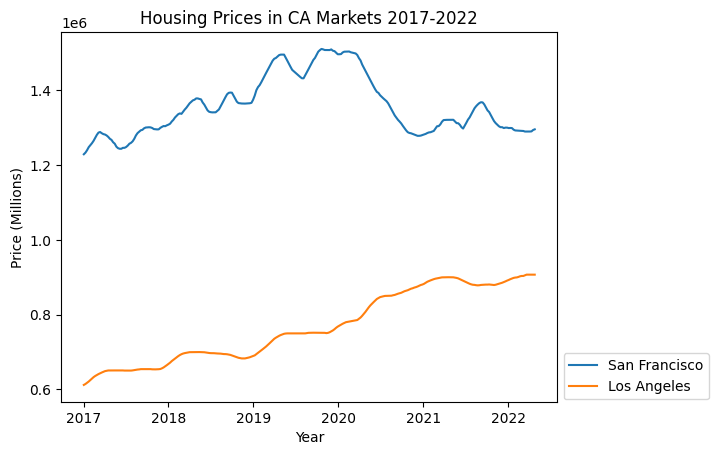

In [11]:
fig, ax = plt.subplots()

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['San Francisco'],
    label='San Francisco'
    )
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['Los Angeles'],
    label='Los Angeles'
    )

ax.set_title('Housing Prices in CA Markets 2017-2022')
ax.set_xlabel('Year')
ax.set_ylabel('Price (Millions)')

# tomar cuidado nesta parte. Ele pega na ordem de indexes. Por sorte SF e LA são 0 e 1.
ax.legend(ca_housing_markets.columns, bbox_to_anchor=(1.32,0.15))

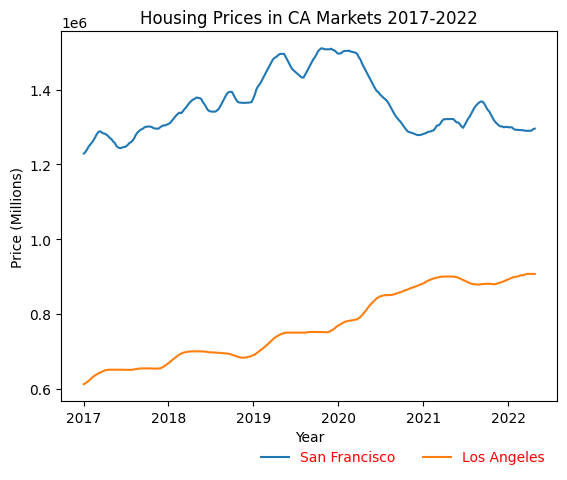

In [12]:
fig, ax = plt.subplots()

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['San Francisco'],
    label='San Francisco'
    )
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['Los Angeles'],
    label='Los Angeles'
    )

ax.set_title('Housing Prices in CA Markets 2017-2022')
ax.set_xlabel('Year')
ax.set_ylabel('Price (Millions)')

# tomar cuidado nesta parte. Ele pega na ordem de indexes. Por sorte SF e LA são 0 e 1.
ax.legend(
    ca_housing_markets.columns, 
    bbox_to_anchor=(1,-.1),
    ncol=2, 
    frameon=False,
    shadow=True,
    title_fontsize=15,
    labelcolor='r',
    )

In [13]:
# class matplotlib.legend.Legend(
# parent, handles, labels, *, loc=None, numpoints=None, markerscale=None, markerfirst=True, reverse=False, scatterpoints=None, scatteryoffsets=None, 
# prop=None, fontsize=None, labelcolor=None, borderpad=None, labelspacing=None, handlelength=None, handleheight=None, handletextpad=None, 
# borderaxespad=None, columnspacing=None, ncols=1, mode=None, fancybox=None, shadow=None, title=None, title_fontsize=None, framealpha=None, edgecolor=None, 
# facecolor=None, bbox_to_anchor=None, bbox_transform=None, frameon=None, 
# handler_map=None, title_fontproperties=None, alignment='center', ncol=1, draggable=False)

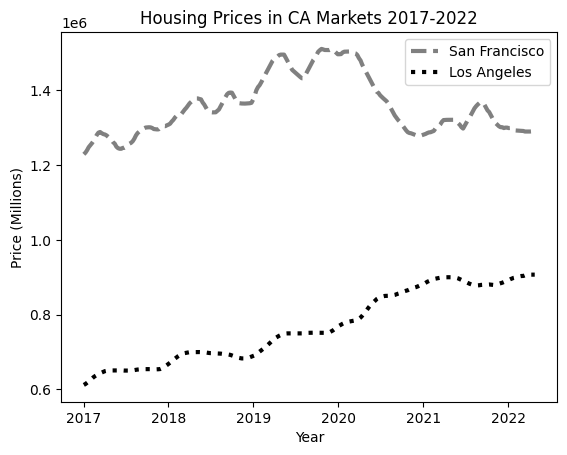

In [14]:
fig, ax = plt.subplots()

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['San Francisco'],
    label='San Francisco',
    color='gray',
    linewidth=3,
    ls='--',
    )
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['Los Angeles'],
    label='Los Angeles',
    color='black',
    linewidth=3,
    ls=':',
    )

ax.set_title('Housing Prices in CA Markets 2017-2022')
ax.set_xlabel('Year')
ax.set_ylabel('Price (Millions)')

# tomar cuidado nesta parte. Ele pega na ordem de indexes. Por sorte SF e LA são 0 e 1.
ax.legend(
    ca_housing_markets.columns, 
)

(0.0, 1600000.0)

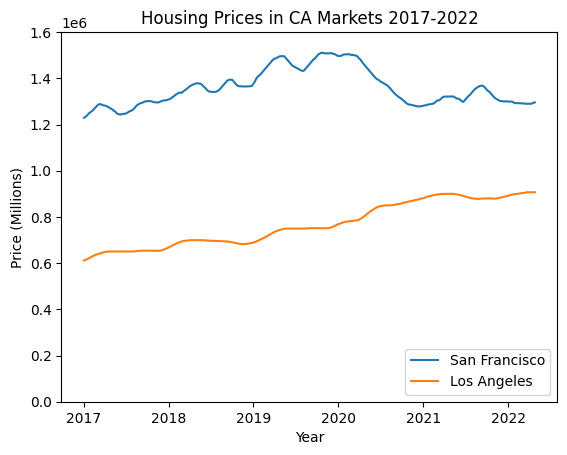

In [15]:
fig, ax = plt.subplots()

ax.plot(
    ca_housing_markets['San Francisco'],
    )
ax.plot(
    ca_housing_markets['Los Angeles'],
    )

ax.set_title('Housing Prices in CA Markets 2017-2022')
ax.set_xlabel('Year')
ax.set_ylabel('Price (Millions)')

# tomar cuidado nesta parte. Ele pega na ordem de indexes. Por sorte SF e LA são 0 e 1.
ax.legend(ca_housing_markets.columns, loc='lower right')

#ax.set_xlim(17500,19000)

# Altera o gap de valores mostrados no eixo Y.
ax.set_ylim(0,1_600_000)

(0.0, 1600000.0)

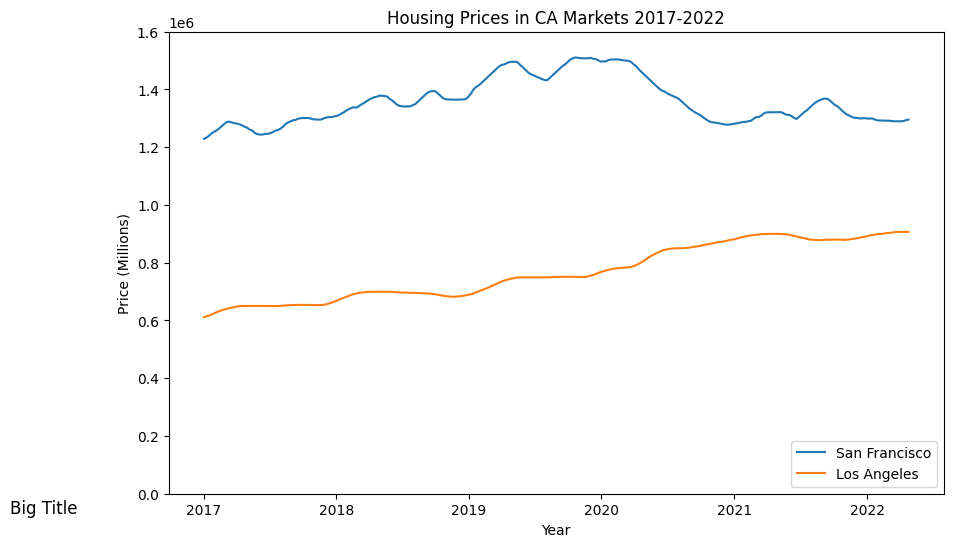

In [16]:
# figsize: em polegadas.
fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Big Title', x=0, y=0.1)

ax.plot(
    ca_housing_markets['San Francisco'],
    )
ax.plot(
    ca_housing_markets['Los Angeles'],
    )

ax.set_title('Housing Prices in CA Markets 2017-2022')
ax.set_xlabel('Year')
ax.set_ylabel('Price (Millions)')

# tomar cuidado nesta parte. Ele pega na ordem de indexes. Por sorte SF e LA são 0 e 1.
ax.legend(ca_housing_markets.columns, loc='lower right')

# Altera o gap de valores mostrados no eixo Y.
ax.set_ylim(0,1_600_000)


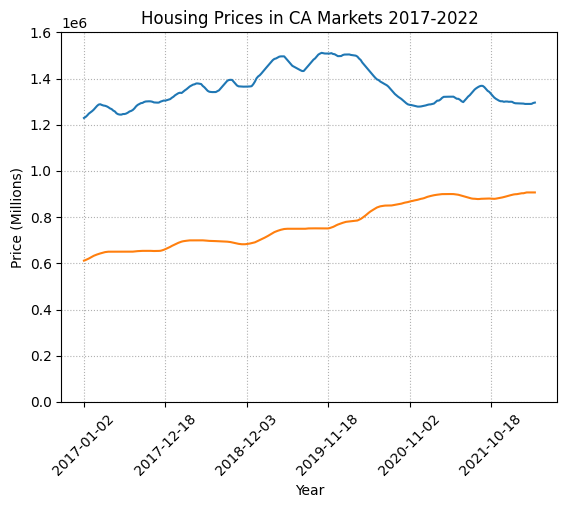

In [17]:
fig, ax = plt.subplots()

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['San Francisco'],
    )
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['Los Angeles'],
    )

ax.set_title('Housing Prices in CA Markets 2017-2022')
ax.set_xlabel('Year')
ax.set_ylabel('Price (Millions)')

# Altera o gap de valores mostrados no eixo Y.
ax.set_ylim(0,1_600_000)

ax.set_xticks(ca_housing_markets.index[::50])
plt.xticks(rotation=45)
plt.grid(visible=True,ls=':')

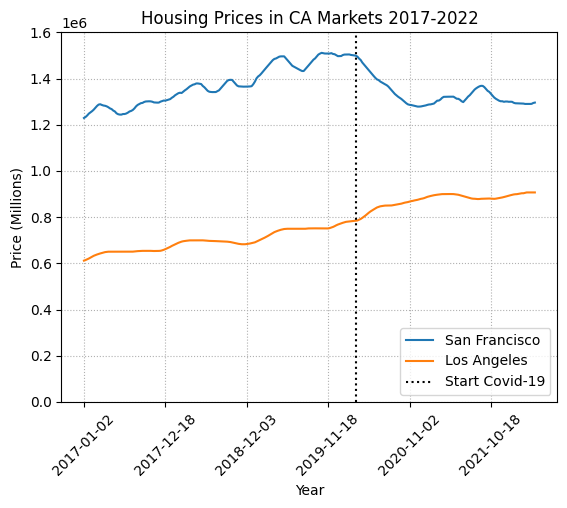

In [18]:
fig, ax = plt.subplots()

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['San Francisco'],
    label='San Francisco'
    )
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['Los Angeles'],
    label='Los Angeles'
    )

ax.set_title('Housing Prices in CA Markets 2017-2022')
ax.set_xlabel('Year')
ax.set_ylabel('Price (Millions)')


# Altera o gap de valores mostrados no eixo Y.
ax.set_ylim(0,1_600_000)

ax.set_xticks(ca_housing_markets.index[::50])
plt.xticks(rotation=45)
plt.grid(visible=True,ls=':')

# Set the coordinate (in this case days since Jan 1, 1970).
# days ao final converte em 'int'.
days = (pd.Timestamp(dt.date(2020, 3, 16))-pd.Timestamp(dt.date(1970, 1, 1))).days

#plt.axvline()
ax.axvline(
    days,
    color='black',
    ls=':',
    label='Start Covid-19',
    # ymin, xmax: altura/tamanho da linha
    )
ax.legend(loc='lower right')

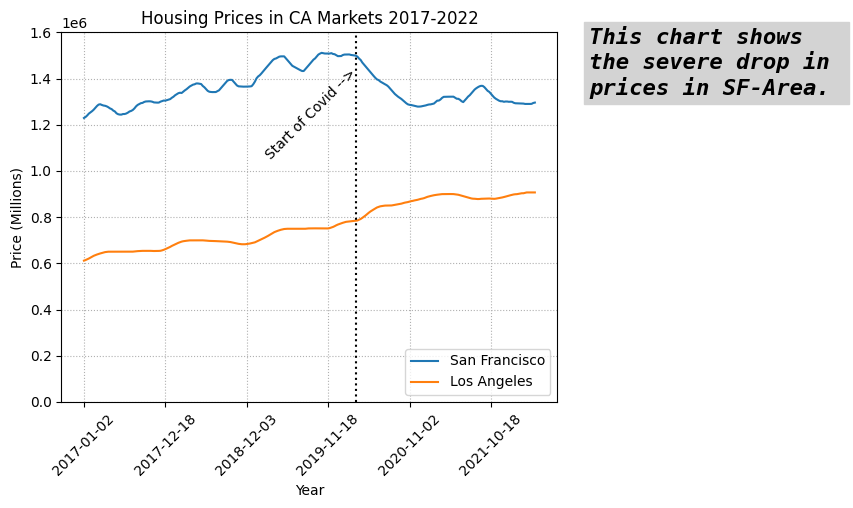

In [19]:
fig, ax = plt.subplots()

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['San Francisco'],
    label='San Francisco'
    )
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['Los Angeles'],
    label='Los Angeles'
    )

ax.set_title('Housing Prices in CA Markets 2017-2022')
ax.set_xlabel('Year')
ax.set_ylabel('Price (Millions)')


# Altera o gap de valores mostrados no eixo Y.
ax.set_ylim(0,1_600_000)

ax.set_xticks(ca_housing_markets.index[::50])
plt.xticks(rotation=45)
plt.grid(visible=True,ls=':')

# Set the coordinate (in this case days since Jan 1, 1970).
# days ao final converte em 'int'.
days = (pd.Timestamp(dt.date(2020, 3, 16))-pd.Timestamp(dt.date(1970, 1, 1))).days

#plt.axvline()
ax.axvline(
    days,
    color='black',
    ls=':',
    # ymin, xmax: altura/tamanho da linha
    # label='Start Covid'
    )

# https://matplotlib.org/stable/users/explain/text/text_props.html

ax.text(
    days-400, # Valor: X
    1_050_000, # Valor: Y (valor em milhões)
    'Start of Covid -->',
    rotation=45
    )

fig.text(
    .95,
    .75,
    'This chart shows \nthe severe drop in \nprices in SF-Area.',
    fontsize=16,
    color='black',
    fontname='Monospace',
    weight='bold',
    style='italic',
    backgroundcolor='lightgray',
)

ax.legend(loc='lower right')


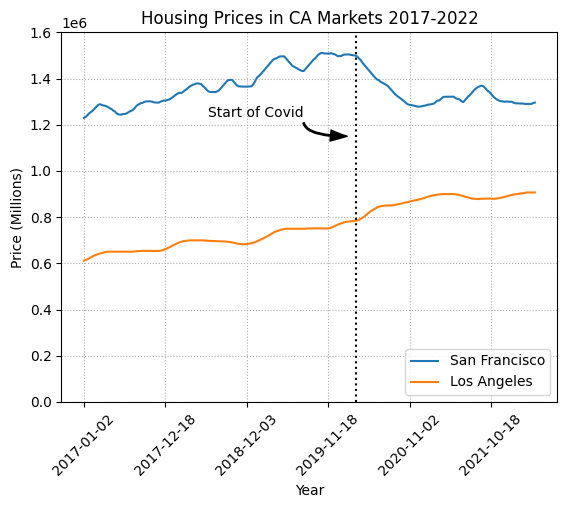

In [20]:
fig, ax = plt.subplots()

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['San Francisco'],
    label='San Francisco'
    )
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['Los Angeles'],
    label='Los Angeles'
    )

ax.set_title('Housing Prices in CA Markets 2017-2022')
ax.set_xlabel('Year')
ax.set_ylabel('Price (Millions)')


# Altera o gap de valores mostrados no eixo Y.
ax.set_ylim(0,1_600_000)

ax.set_xticks(ca_housing_markets.index[::50])
plt.xticks(rotation=45)
plt.grid(visible=True,ls=':')

# Set the coordinate (in this case days since Jan 1, 1970).
# days ao final converte em 'int'.
days = (pd.Timestamp(dt.date(2020, 3, 16))-pd.Timestamp(dt.date(1970, 1, 1))).days

#plt.axvline()
ax.axvline(
    days,
    color='black',
    ls=':',
    # ymin, xmax: altura/tamanho da linha
    # label='Start Covid'
    )

# https://matplotlib.org/stable/users/explain/text/annotations.html

ax.annotate(
    "Start of Covid",
    xy=(18300, 1_150_000),
    xytext=(17700, 1_250_000),
    arrowprops=dict(
        facecolor='black',
        width=1,
        headwidth=8,
        connectionstyle='angle3, angleA=270, angleB=0'
    ),
    verticalalignment='center'
)

ax.legend(loc='lower right')


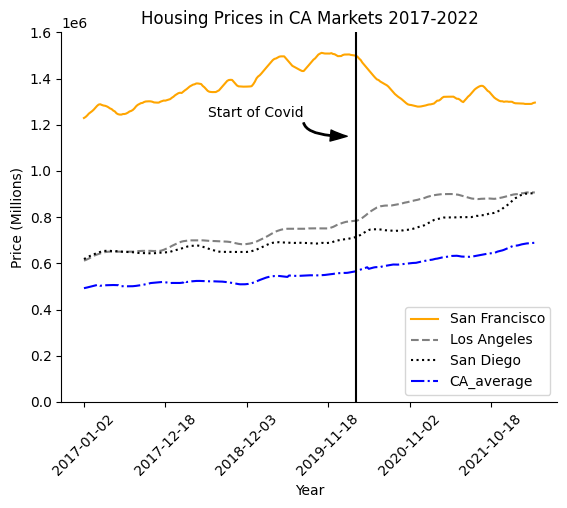

In [21]:
fig, ax = plt.subplots()

colors=['orange','grey','black','blue']
ls=['-','--',':','-.']

for i, column in enumerate(ca_housing_markets.columns):
    ax.plot(
        ca_housing_markets[column],
        colors[i],
        ls=ls[i],
        label=ca_housing_markets.columns[i]
    )

ax.set_title('Housing Prices in CA Markets 2017-2022')
ax.set_xlabel('Year')
ax.set_ylabel('Price (Millions)')

# Altera o gap de valores mostrados no eixo Y.
ax.set_ylim(0,1_600_000)

ax.set_xticks(ca_housing_markets.index[::50])
plt.xticks(rotation=45)

# Set the coordinate (in this case days since Jan 1, 1970).
# days ao final converte em 'int'.
days = (pd.Timestamp(dt.date(2020, 3, 16))-pd.Timestamp(dt.date(1970, 1, 1))).days

#plt.axvline()
ax.axvline(
    days,
    color='black',
    ls='-',
    # ymin, xmax: altura/tamanho da linha
    # label='Start Covid'
    )

ax.annotate(
    "Start of Covid",
    xy=(18300, 1_150_000),
    xytext=(17700, 1_250_000),
    arrowprops=dict(
        facecolor='black',
        width=1,
        headwidth=8,
        connectionstyle='angle3, angleA=270, angleB=0'
    ),
    verticalalignment='center'
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(loc='lower right')
